# Plotting time

A snapshot in time doesn't give you much information. Is the data improving or getting worse?

To make sense of data, you need context. That's where time comes in.

In [1]:
import io
import pandas as pd
import requests

# Round values to 3 decimal places.
pd.set_option('display.float_format', '{:.3f}'.format)

In [78]:
url="https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1699740944"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')), encoding = "utf-8", index_col="RegionID")
df.head(2)

,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
RegionID,,,,,,,,,,,,,,,,,,,,,
102001,0,United States,country,NaN,121428.348,121641.980,121906.914,122475.146,123129.114,123830.255,...,341524.687,340331.965,339460.291,339398.681,340364.872,341993.735,343935.027,345686.216,347311.245,348538.962
394913,1,"New York, NY",msa,NY,216218.985,217137.794,218065.112,219944.218,221890.098,224047.392,...,607957.914,607138.376,605781.039,606096.535,608105.121,612136.786,616308.017,619911.494,623211.985,625939.721


<Axes: >

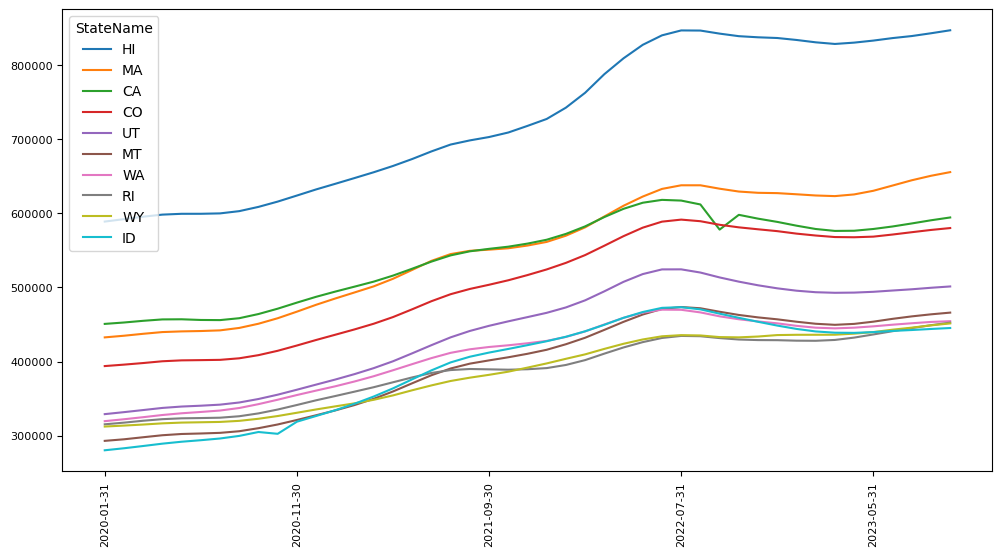

In [85]:

cols = [c for c in df.columns if c.startswith(('2020','2021','2022','2023'))]
md = df.groupby('StateName')[cols].mean().nlargest(10, columns=cols[-1]).transpose()
md.plot(figsize=(12,6), rot=90, fontsize=8)


<Axes: >

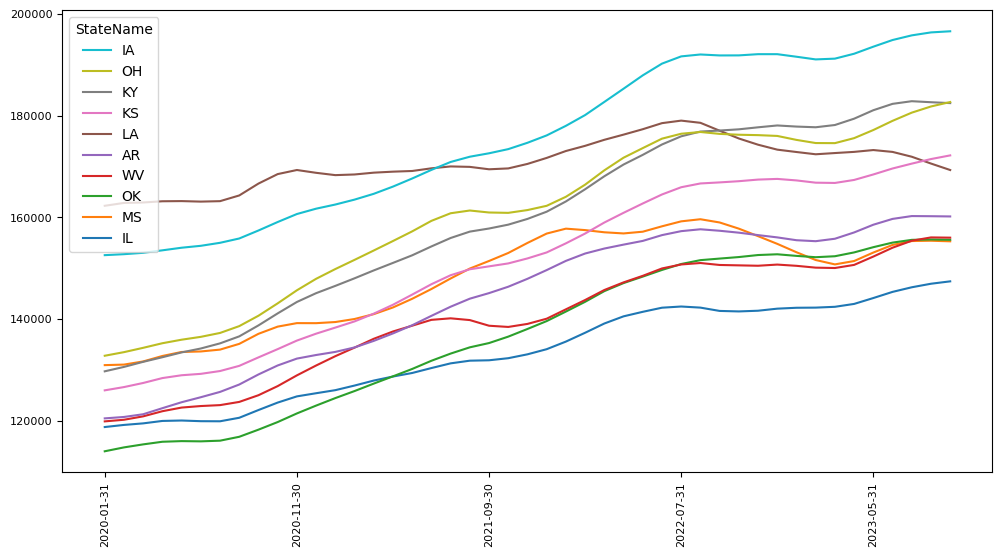

In [88]:
cols = [c for c in df.columns if c.startswith(('2020','2021','2022', '2023'))]
md = df.groupby('StateName')[cols].mean().nsmallest(10, columns=cols[-1]).transpose()
md.plot(figsize=(12,6), rot=90, fontsize=8, legend='reverse')